In [1]:
import pickle
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
import copy, time

C:\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
embedder = load_model("vgg_face_embedder.h5")

In [3]:
face_rec_model = load_model('face_rec_96.h5')

In [ ]:
with open("pcaembdl","rb") as f:
    x_train_pca,x_test_pca

In [5]:
import tensorflow as tf

In [6]:
tf.keras.utils.plot_model(embedder)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
with open("scaler_pca_ledl","rb") as f:
    scaler,pca,le2 = pickle.load(f)

In [14]:
# Load pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [15]:
def identify(img_name):
    start = time.time()
    try:
        inp_img = cv2.imread(rf"D:\Users\DELL\Desktop\Major Project\Github Face Rec\test_images\{img_name}.jpg")
        gray=cv2.cvtColor(inp_img, cv2.COLOR_BGR2GRAY)
        inp_faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
        ct = 0
        new_img = copy.deepcopy(inp_img)
        print("Maximum Probabilities:")
        for (x, y, w, h) in inp_faces:
            input_face_region = inp_img[y:y+h, x:x+w]
            img = (input_face_region / 255.).astype(np.float32)
            img = cv2.resize(img, dsize = (224,224))
            embedding_vector = embedder.predict(np.expand_dims(img, axis=0),verbose=0)[0]
            embv_scaled = scaler.transform([embedding_vector])
            embv_pca = pca.transform(embv_scaled)
            #name = le.inverse_transform(mlp.predict(embv_pca))[0][5:]
            probabs = face_rec_model.predict(embv_pca)
            if np.max(probabs) > 0.90:
                name = le2.inverse_transform([np.argmax(probabs)])[0][5:]
            else:
                name = 'not recognized'
            print(np.max(probabs),"-", name)
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),2)
            new_img = cv2.putText(new_img,name,(x,y-10),cv2.FONT_HERSHEY_PLAIN,1,(255,0,255),2,cv2.LINE_4)
        new_img = new_img[...,::-1]
        plt.figure(figsize=(15,15))
        plt.imshow(new_img)
        end = time.time()
        print("\nTotal Execution Time in Seconds:")
        print(end-start,"s")
    except:
        inp_img = cv2.imread(rf"D:\Users\DELL\Desktop\Major Project\Github Face Rec\test_images\{img_name}.jpeg")
        gray=cv2.cvtColor(inp_img, cv2.COLOR_BGR2GRAY)
        inp_faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
        ct = 0
        new_img = copy.deepcopy(inp_img)
        print("Maximum Probabilities:")
        for (x, y, w, h) in inp_faces:
            input_face_region = inp_img[y:y+h, x:x+w]
            img = (input_face_region / 255.).astype(np.float32)
            img = cv2.resize(img, dsize = (224,224))
            embedding_vector = embedder.predict(np.expand_dims(img, axis=0),verbose=0)[0]
            embv_scaled = scaler.transform([embedding_vector])
            embv_pca = pca.transform(embv_scaled)
            #name = le.inverse_transform(mlp.predict(embv_pca))[0][5:]
            probabs = face_rec_model.predict(embv_pca)
            if np.max(probabs) > 0.90:
                name = le2.inverse_transform([np.argmax(probabs)])[0][5:]
            else:
                name = 'not recognized'
            print(np.max(probabs),"-", name)
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),2)
            new_img = cv2.putText(new_img,name,(x,y-10),cv2.FONT_HERSHEY_PLAIN,1,(255,0,255),2,cv2.LINE_4)
        new_img = new_img[...,::-1]
        plt.figure(figsize=(15,15))
        plt.imshow(new_img)
        end = time.time()
        print("\nTotal Execution Time in Seconds:")
        print(end-start,"s")

Maximum Probabilities:
1/1 [==============================] - 0s 247ms/step
0.99492234 - Chris Evans

Total Execution Time in Seconds:
2.7023727893829346 s


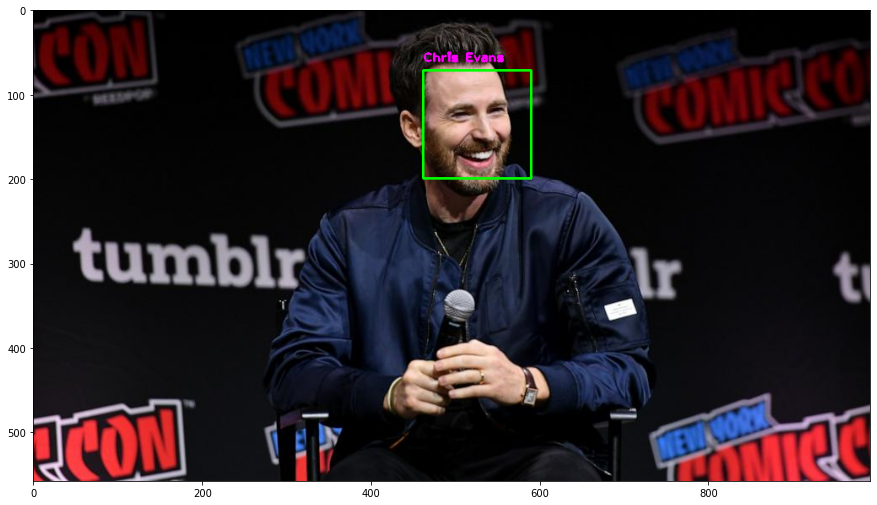

In [16]:
identify('chris_evans')